In [40]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [94]:

sns.set(style="ticks", context="poster",rc={"grid.linewidth": 0.5,"xtick.major.width": 0.5,"ytick.major.width": 0.5, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [95]:
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =10

In [96]:
Moore2015=pd.read_excel('Literature_Densities.xlsx', sheet_name='Moore_2015')
Moore2015_df=pd.DataFrame(data={'Reference': 'Moore et al. (2015)', 
                                'Density':Moore2015['Density'],
                               'Order': 1,
                                   'Calib': 1})

In [97]:
Moore2018=pd.read_excel('Literature_Densities.xlsx', sheet_name='Moore_2018_Kam')
Moore2018_df=pd.DataFrame(data={'Reference': 'Moore et al. 2018', 
                                'Density': Moore2018['bubble density, g/cc'],
                               'Order': 2,
                               
                                   'Calib': 1})

In [98]:
Wieser2021=pd.read_excel('Literature_Densities.xlsx', sheet_name='Wieser_2021')
Wieser2021_df=pd.DataFrame(data={'Reference': 'Wieser et al. 2021', 
                                'Density': Wieser2021['CO2 density (g/cm3)'],
                                'Order': 3,
                                   'Calib': 1})

In [99]:
Allison2021=pd.read_excel('Literature_Densities.xlsx', sheet_name='Allison_2021')
Allison2021_df=pd.DataFrame(data={'Reference': 'Allison et al. 2021', 
                                'Density': Allison2021['Density'],
                                 'Order': 4,
                                   'Calib': 1})



In [100]:
Wong2023=pd.read_excel('Literature_Densities.xlsx', sheet_name='Wong2023')
Wong2023_df=pd.DataFrame(data={'Reference': 'Wong et al. 2023', 
                                'Density': Wong2023['CO2_rho'],
                                   'Order': 5,
                                   'Calib': 1})
Wong2023_df

,Reference,Density,Order,Calib
0,Wong et al. 2023,0.033463,5,1
1,Wong et al. 2023,0.059369,5,1
2,Wong et al. 2023,0.005630,5,1
3,Wong et al. 2023,0.026941,5,1
4,Wong et al. 2023,0.055991,5,1
...,...,...,...,...
93,Wong et al. 2023,0.098555,5,1
94,Wong et al. 2023,0.108796,5,1
95,Wong et al. 2023,0.071486,5,1
96,Wong et al. 2023,0.086087,5,1


(array([13., 25., 15., 18., 20.,  2.,  3.,  0.,  1.,  1.]),
 array([0.00075633, 0.02930339, 0.05785045, 0.08639752, 0.11494458,
        0.14349165, 0.17203871, 0.20058578, 0.22913284, 0.2576799 ,
        0.28622697]),
 <BarContainer object of 10 artists>)

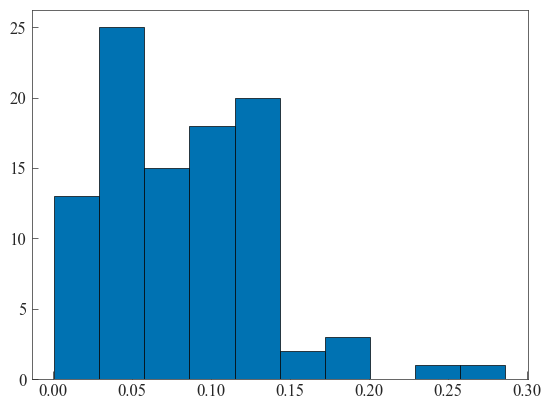

In [101]:
plt.hist(Wong2023_df['Density'])

In [102]:
a=2
Hartley2014=pd.read_excel('Literature_Densities.xlsx', sheet_name='Hartley_2014')
Hartley2014_df=pd.DataFrame(data={'Reference': 'Hartley et al. (2014)', 
                                'Density':Hartley2014['Density g/cm3'],
                                 'Order': 5+a,
                                   'Calib': 0})

In [103]:
Rob=pd.read_excel('Literature_Densities.xlsx', sheet_name='Robidoux_2018Density')
Rob_df=pd.DataFrame(data={'Reference': 'Robidoux et al. 2018', 
                                'Density': Rob['Density'],
                         'Order': 6+a ,
                         'Calib': 0})

In [104]:
Bali2018=pd.read_excel('Literature_Densities.xlsx', sheet_name='Bali_2018')
Bali2018_df=pd.DataFrame(data={'Reference': 'Bali et al. (2018)', 
                                'Density': Bali2018['density'],
                              'Order': 7+a,
                                   'Calib': 0})

In [105]:
Zoltan2019=pd.read_excel('Literature_Densities.xlsx', sheet_name='Zoltan_2019')
Zoltan2019_df=pd.DataFrame(data={'Reference': 'Taracsák et al. (2019)', 
                                'Density': Zoltan2019['CO2 density g/cm3 (G)'],
                                'Order': 8+a,
                                   'Calib': 0})

In [106]:
Venogupal2020=pd.read_excel('Literature_Densities.xlsx', sheet_name='Venogupal_2020')
Venogupal2020_df=pd.DataFrame(data={'Reference': 'Venogupal et al. 2020', 
                                'Density': Venogupal2020['density (g/cm3) '],
                                   'Order': 9+a,
                                   'Calib': 0})

In [107]:
combined_df=pd.concat([Moore2015_df,Moore2018_df, Wieser2021_df, Allison2021_df, Wong2023_df,
                       Hartley2014_df, Rob_df, Bali2018_df, Zoltan2019_df, Venogupal2020_df,])

In [108]:
combined_df_z=combined_df.fillna(0)
combined_df_nonan=combined_df_z.loc[~(combined_df_z['Density']==0)]

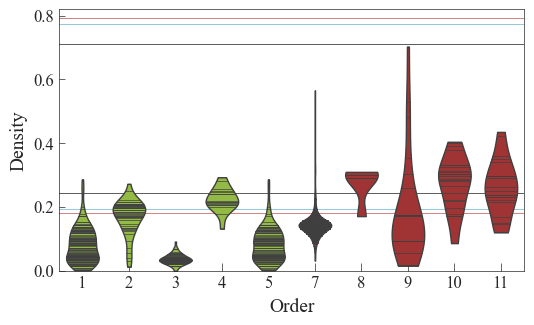

In [114]:
#eference	Density	Density g/cm3
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(6,4*0.848))
#ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Glacier', 'Glacier', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Order"]
sns.violinplot(x="Order", y="Density", data=combined_df_nonan,  cut=0, 
               ax=ax1,linewidth=1, width=0.7, inner='stick',hue="Calib",dodge=False, palette=[ 'firebrick', 'yellowgreen'])
#sns.violinplot(x="Order", y="Density",  cut=0,  inner=None, 
#             data=combined_df_nonan, ax=ax1, width=0.9, order=volc_order, stick=True)
ax1.get_legend().remove()
ax1.set_ylim([0, 0.82])
lw2=0.5
x1=-1
x2=10
ax1.plot([x1, x2], [0.18, 0.18], '-r', zorder=0, lw=lw2)
ax1.plot([x1, x2], [0.194, 0.194], '-c', zorder=0, lw=lw2)
ax1.plot([x1, x2], [0.243, 0.243], '-k', zorder=0, lw=lw2)


ax1.plot([x1, x2], [0.794, 0.794], '-r', zorder=0, lw=lw2)
ax1.plot([x1, x2], [0.773, 0.773], '-c', zorder=0, lw=lw2)

ax1.plot([x1, x2], [0.711, 0.711], '-k', zorder=0, lw=lw2)
ax1.set_xlim([-0.5, 9.5])
fig.savefig('Densities_other.png', dpi=300)


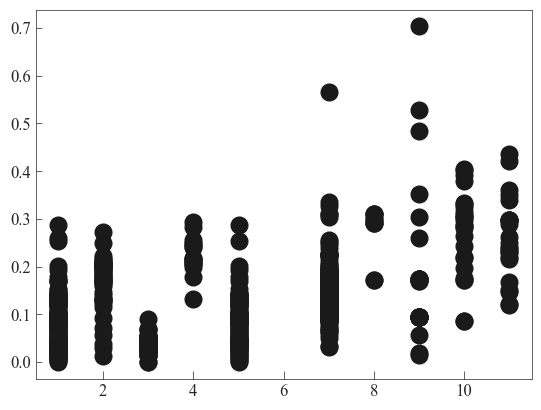

In [110]:
plt.plot(combined_df_nonan['Order'], combined_df_nonan['Density'], 'ok')#Moore2015_df['Density'].dtypes

TypeError: 'module' object is not callable

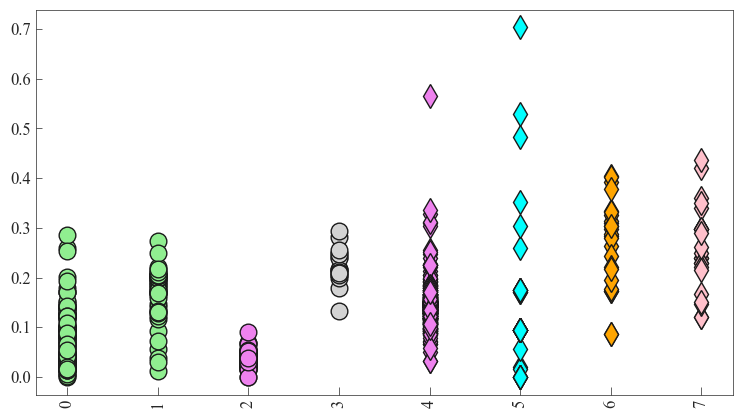

In [112]:
import seaborn as sns
fig, (ax0) = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
#ax0 = sns.violinplot(x="Reference", y="Density", data=combined_df, inner="stick", cut=0, width=1)
plt.xticks(rotation=90)
ax0.plot(Moore2015_df['Density']*0, Moore2015_df['Density'], 'ok', mfc='lightgreen')
ax0.plot(Moore2018_df['Density']*0+1, Moore2018_df['Density'], 'ok', mfc='lightgreen')
ax0.plot(Wieser2021_df['Density']*0+2, Wieser2021_df['Density'], 'ok', mfc='violet')
ax0.plot(Allison2021_df['Density']*0+3, Allison2021_df['Density'], 'ok', mfc='lightgrey')


ax0.plot(Hartley2014_df['Density']*0+4, Hartley2014_df['Density'], 'dk', mfc='violet')
ax0.plot(Bali2018_df['Density']*0+5, Bali2018_df['Density'], 'dk', mfc='cyan')
ax0.plot(Zoltan2019_df['Density']*0+6, Zoltan2019_df['Density'], 'dk', mfc='orange')
ax0.plot(Venogupal2020_df['Density']*0+7, Venogupal2020_df['Density'], 'dk', mfc='pink')
ax0.plot(Rob_df['Density']*0+8+np.random(1), Rob_df['Density'], 'dk', mfc='white', alpha=0.5)


ax0.plot([0, 8], [0.21, 0.21], '-r', lw=0.1)
ax0.plot([0, 8], [0.25, 0.25], '-r', lw=0.1)
ax0.set_ylim([-0.05, 0.85])
ax0.set_xticks([])
ax0.set_ylabel('Density (g/cm$^{3}$)')
fig.savefig('Densities_Lit.png', dpi=200)

In [57]:
combined_df_nonan['Order'].dtypes

dtype('int64')

In [58]:
combined_df['Density']

0     0.259968
1          NaN
2     0.035285
3     0.145787
4     0.093862
        ...   
18    0.220451
19    0.298195
20    0.215976
21    0.261247
22        0.29
Name: Density, Length: 1029, dtype: object

## For Review

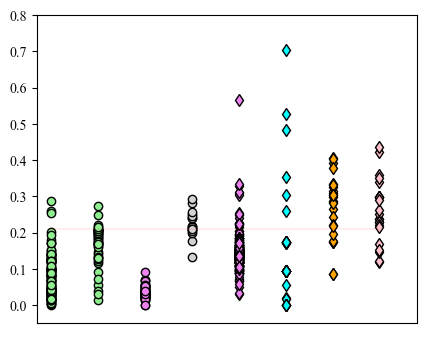

In [59]:
import seaborn as sns
fig, (ax0) = plt.subplots(1, 1, figsize=(4.9, 4), sharey=True)
#ax0 = sns.violinplot(x="Reference", y="Density", data=combined_df, inner="stick", cut=0, width=1)
plt.xticks(rotation=90)
ax0.plot(Moore2015_df['Density']*0, Moore2015_df['Density'], 'ok', mfc='lightgreen')
ax0.plot(Moore2018_df['Density']*0+1, Moore2018_df['Density'], 'ok', mfc='lightgreen')
ax0.plot(Wieser2021_df['Density']*0+2, Wieser2021_df['Density'], 'ok', mfc='violet')
ax0.plot(Allison2021_df['Density']*0+3, Allison2021_df['Density'], 'ok', mfc='lightgrey')
ax0.plot(Hartley2014_df['Density']*0+4, Hartley2014_df['Density'], 'dk', mfc='violet')
ax0.plot(Bali2018_df['Density']*0+5, Bali2018_df['Density'], 'dk', mfc='cyan')
ax0.plot(Zoltan2019_df['Density']*0+6, Zoltan2019_df['Density'], 'dk', mfc='orange')
ax0.plot(Venogupal2020_df['Density']*0+7, Venogupal2020_df['Density'], 'dk', mfc='pink')


ax0.plot([0, 7], [0.21, 0.21], '-r', lw=0.1)
#ax0.plot([0, 7], [0.25, 0.25], '-r', lw=0.1)
ax0.set_ylim([-0.05, 0.8])
ax0.set_xlim([-0.3, 7.8])
ax0.set_xticks([])
#ax0.set_ylabel('Density (g/cm$^{3}$)')
fig.savefig('Densities_Lit.png', dpi=300, transparent=True)